In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_excel("C:\\Users\\Yadav\\Downloads\\DS-assignment\\DS - Assignment Part 1 data set.xlsx")

In [3]:
data.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [8]:
print(data.shape)
print(data.size)
print(data.ndim)

(414, 9)
3726
2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [5]:
data.isna().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

In [6]:
data.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [16]:
X=data.iloc[:,:8]
y=data.iloc[:,-1]

In [15]:
X.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft)
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491


In [17]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: House price of unit area, dtype: float64

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=1)

In [24]:
X_train.shape

(331, 8)

In [25]:
X_test.shape

(83, 8)

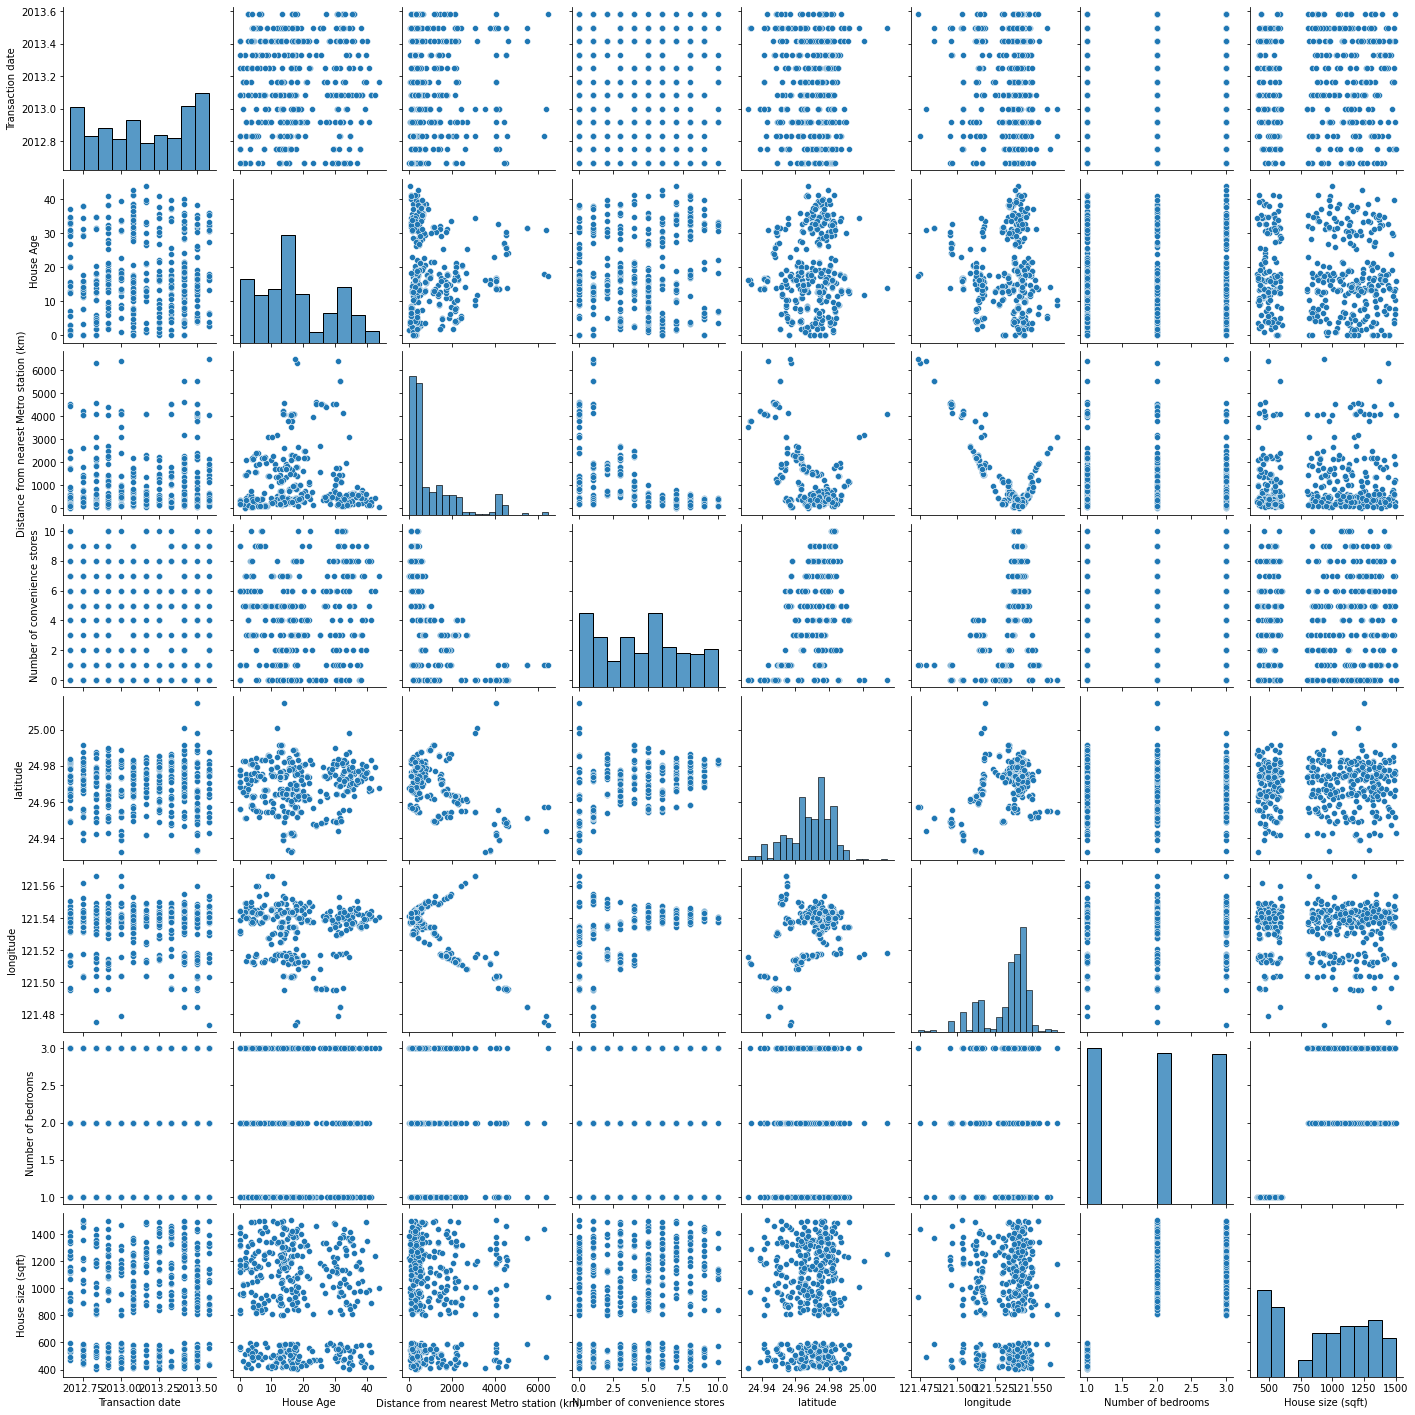

In [302]:
sns.pairplot(X)
plt.show()

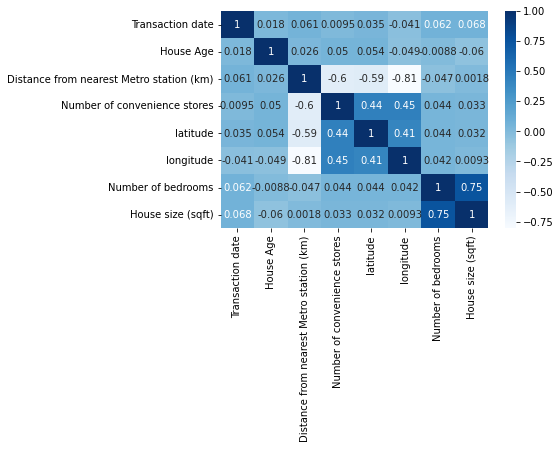

In [305]:
sns.heatmap(X.corr(),cmap="Blues",annot=True)
plt.show()

### Linear regression algo

In [41]:
X_train_sc=StandardScaler().fit_transform(X_train)
X_test_sc=StandardScaler().fit(X_test)
X_train_rc=RobustScaler().fit_transform(X_train)
X_test_rc=RobustScaler().fit(X_test)
X_train_mc=MinMaxScaler().fit_transform(X_train)
X_test_mc=MinMaxScaler().fit(X_test)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr=LinearRegression()
lr.fit(X_train_rc,y_train)
lr.score(X_train_rc,y_train)

0.5514470424083107

In [44]:
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.5514470424082913

In [45]:
lr=LinearRegression()
lr.fit(X_train_mc,y_train)
lr.score(X_train_mc,y_train)

0.5514470424083069

### Random forest algo

In [54]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [221]:
rf=RandomForestRegressor(n_estimators=55,max_depth=6)

In [298]:
rf.fit(X_train,y_train)
rf.score(X_train,y_train)

0.8978384478853131

In [300]:
rf.score(X_test,y_test)

0.6585626968575301

### Gradiant Boosting algo

In [163]:
gb=GradientBoostingRegressor(learning_rate=.01,n_estimators=100,max_depth=10)

In [283]:
gb.fit(X_train,y_train)
gb.score(X_train,y_train)

0.857691783586604

In [284]:
gb.score(X_test,y_test)

0.6679716995627828

### Xgboost algo

In [224]:
import xgboost as xg

In [310]:
model = xg.XGBRegressor(n_estimators=250, max_depth=7, eta=0.01)

In [317]:
model.fit(X_train,y_train)
model.score(X_train,y_train)

0.8501973888689065

In [318]:
model.score(X_test,y_test)

0.7055778097235024

In [319]:
y_pred=model.predict(X_test)

In [344]:
y_test[:5]

388    27.3
102    54.4
187    22.0
162    11.6
90     45.4
Name: House price of unit area, dtype: float64

In [345]:
y_pred[:5]

array([23.831427, 44.346066, 21.748295, 13.058467, 54.731575],
      dtype=float32)